In [1]:
# our commonly used functions
from global_bug_bot_functions import  *


# libraries for building convolutional neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# libraries for tuning models
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperParameters
from tensorflow.keras import backend as K
from keras.callbacks import History, EarlyStopping


# utility libraries
import os
import time
import itertools
import random
import numpy as np



# Set random seeds for reproducibility
seed_value = 2025
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

# data set constants
TRAIN_GENERATOR = load_data(TRAIN_DIR)
VAL_GENERATOR = load_data(VALID_DIR)
TEST_GENERATOR = load_data(TEST_DIR, shuffle_flag=False)
EVAL_VAL_GENERATOR = load_data(VALID_DIR, shuffle_flag=False)

# best hps found from tuning
# from ep20_pat3_del0.001_ex1_maxtr20_from_tuning_script_final_tuned_models_results_MobileNetV2.csv
# ---> tuned with max epoch = 20, patience = 3, minimum delta = 0.001, max trials = 20
best_lr = 0.001
best_dropout = 0.2
best_batch_size	= 64
best_epochs	= 5


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# freeze the base model layers
base_model.trainable = False

# global pooling and dropout layers included similar to jute pest architecture
x = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
x = Dropout(best_dropout)(x)

# final softmax probabilistic classification layer
output_layer = Dense(TRAIN_GENERATOR.num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output_layer)

optimizer = Adam(learning_rate=best_lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(TRAIN_GENERATOR,validation_data=VAL_GENERATOR, epochs = best_epochs, batch_size = best_batch_size)



Found 6090 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Found 220 images belonging to 11 classes.
Found 440 images belonging to 11 classes.
Epoch 1/5


/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


191/191 ━━━━━━━━━━━━━━━━━━━━ 49s 244ms/step - accuracy: 0.4495 - loss: 1.7182 - val_accuracy: 0.6455 - val_loss: 1.0689
Epoch 2/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 239ms/step - accuracy: 0.7766 - loss: 0.7060 - val_accuracy: 0.6545 - val_loss: 1.0076
Epoch 3/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 46s 241ms/step - accuracy: 0.8307 - loss: 0.5226 - val_accuracy: 0.6682 - val_loss: 0.9835
Epoch 4/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 244ms/step - accuracy: 0.8763 - loss: 0.4202 - val_accuracy: 0.6932 - val_loss: 0.9756
Epoch 5/5
191/191 ━━━━━━━━━━━━━━━━━━━━ 47s 248ms/step - accuracy: 0.8933 - loss: 0.3584 - val_accuracy: 0.6818 - val_loss: 1.0044


# Validation plots

14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.727273,0.800000,0.761905,40.000000
american_house_spider,0.651163,0.700000,0.674699,40.000000
bedbug,0.838710,0.650000,0.732394,40.000000
brown_stink_bug,0.866667,0.650000,0.742857,40.000000
carpenter_ant,0.595745,0.700000,0.643678,40.000000
cellar_spider,0.906250,0.725000,0.805556,40.000000
flea,0.375000,0.675000,0.482143,40.000000
house_centipede,0.888889,0.800000,0.842105,40.000000
silverfish,0.750000,0.675000,0.710526,40.000000
subterranean_termite,0.555556,0.500000,0.526316,40.000000


<Figure size 800x600 with 0 Axes>

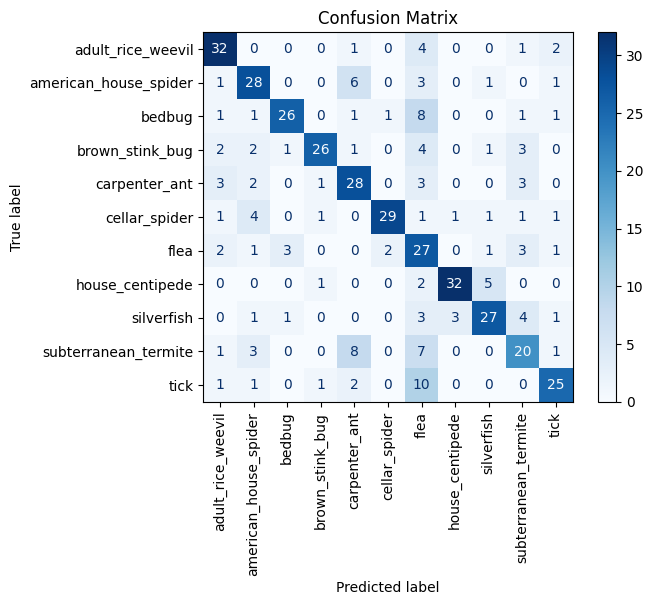

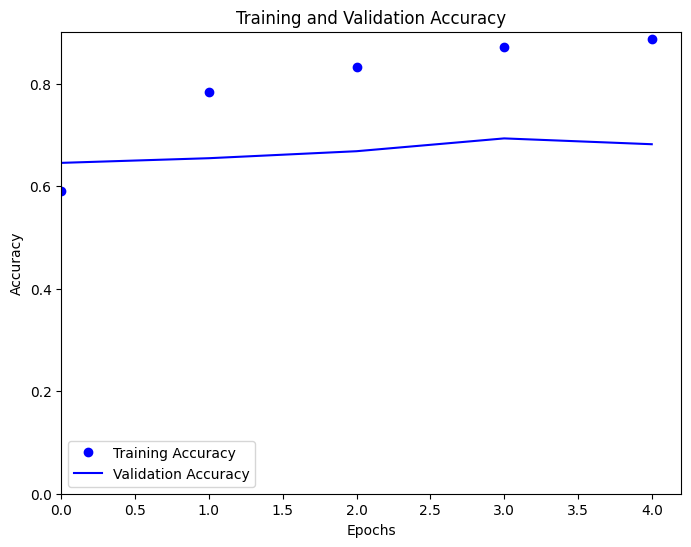

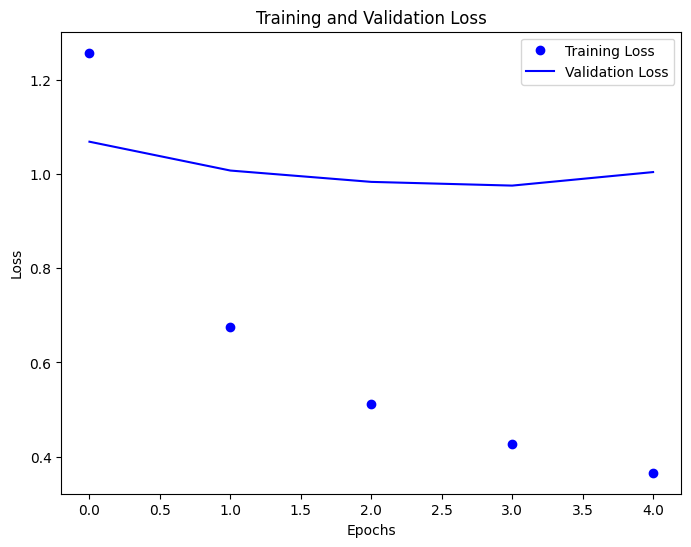

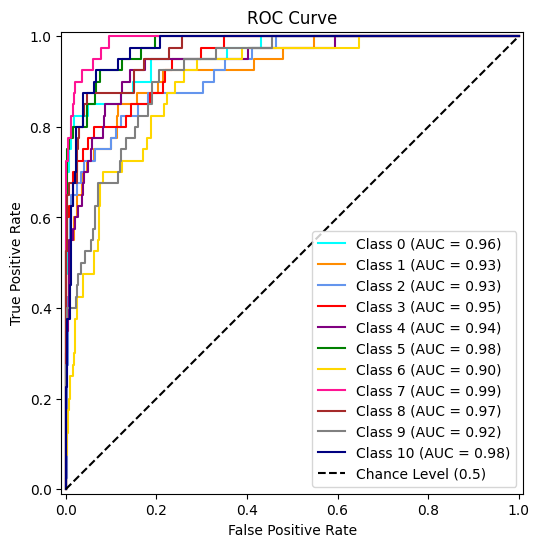

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.682
Precision: 0.719
Recall: 0.682
F1 Score: 0.692


{'accuracy': 0.682,
 'precision': 0.719,
 'recall': 0.682,
 'f1_score': 0.692,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.727273  0.800000  0.761905   40.000000
 american_house_spider   0.651163  0.700000  0.674699   40.000000
 bedbug                  0.838710  0.650000  0.732394   40.000000
 brown_stink_bug         0.866667  0.650000  0.742857   40.000000
 carpenter_ant           0.595745  0.700000  0.643678   40.000000
 cellar_spider           0.906250  0.725000  0.805556   40.000000
 flea                    0.375000  0.675000  0.482143   40.000000
 house_centipede         0.888889  0.800000  0.842105   40.000000
 silverfish              0.750000  0.675000  0.710526   40.000000
 subterranean_termite    0.555556  0.500000  0.526316   40.000000
 tick                    0.757576  0.625000  0.684932   40.000000
 accuracy                0.681818  0.681818  0.681818    0.681818
 macro avg               0.719348  

In [2]:
%matplotlib inline
evaluation_metrics(model, EVAL_VAL_GENERATOR, history)


# Validation metrics:'accuracy': 0.682,'precision': 0.719, 'recall': 0.682,'f1_score': 0.692

# Test plots

/Users/keeganveazey/Desktop/ds_capstone/BugBot/bugbot_env/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 227ms/step
Classification Report:


,precision,recall,f1-score,support
adult_rice_weevil,0.875000,0.700000,0.777778,20.000000
american_house_spider,0.882353,0.750000,0.810811,20.000000
bedbug,0.500000,0.400000,0.444444,20.000000
brown_stink_bug,0.833333,0.750000,0.789474,20.000000
carpenter_ant,0.666667,0.700000,0.682927,20.000000
cellar_spider,0.863636,0.950000,0.904762,20.000000
flea,0.410256,0.800000,0.542373,20.000000
house_centipede,0.904762,0.950000,0.926829,20.000000
silverfish,1.000000,0.650000,0.787879,20.000000
subterranean_termite,0.722222,0.650000,0.684211,20.000000


<Figure size 800x600 with 0 Axes>

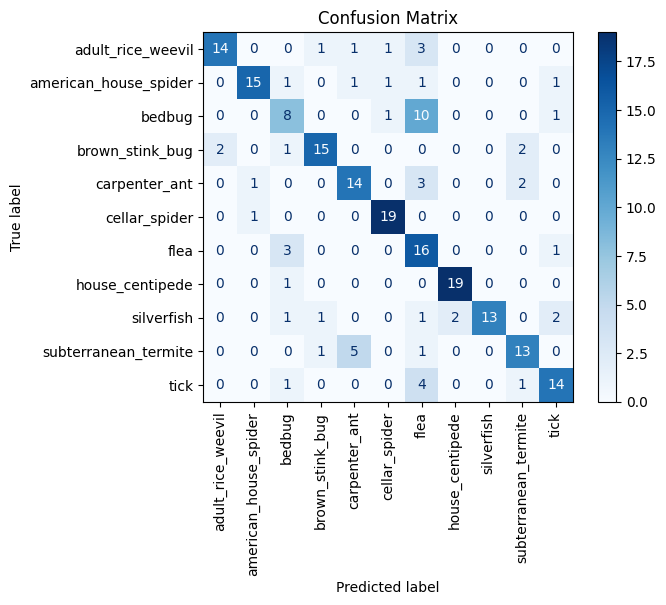

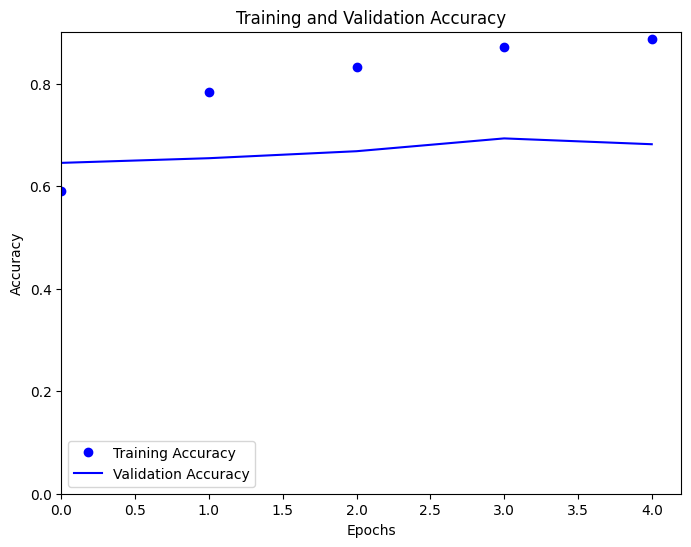

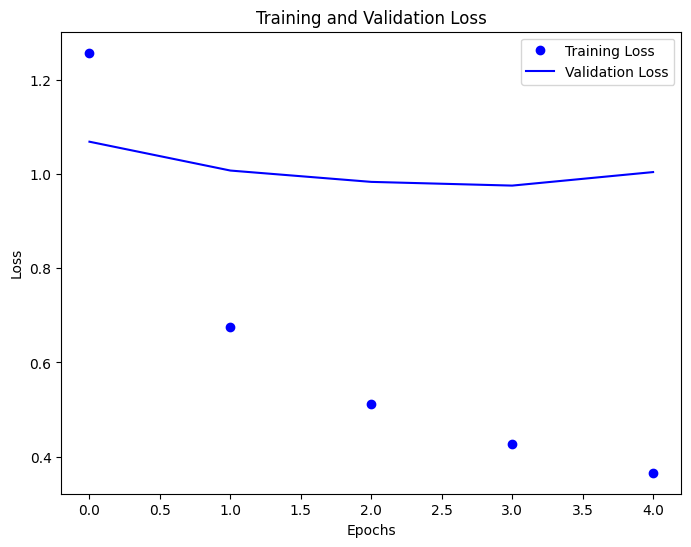

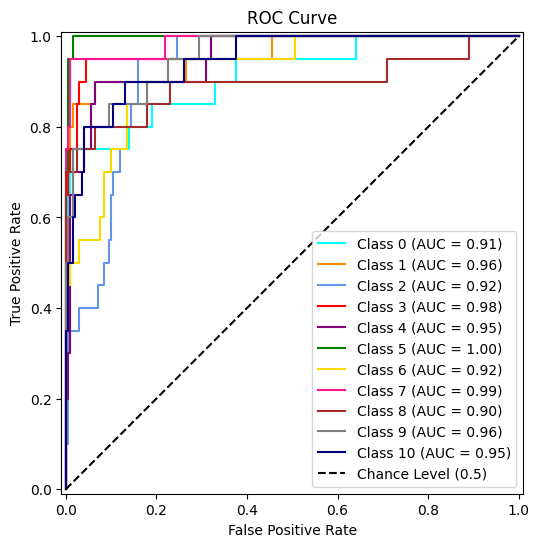

Macro-averaged One-vs-One ROC AUC score: 0.95
Accuracy: 0.727
Precision: 0.763
Recall: 0.727
F1 Score: 0.734


{'accuracy': 0.727,
 'precision': 0.763,
 'recall': 0.727,
 'f1_score': 0.734,
 'classification_report_df':                        precision    recall  f1-score     support
 adult_rice_weevil       0.875000  0.700000  0.777778   20.000000
 american_house_spider   0.882353  0.750000  0.810811   20.000000
 bedbug                  0.500000  0.400000  0.444444   20.000000
 brown_stink_bug         0.833333  0.750000  0.789474   20.000000
 carpenter_ant           0.666667  0.700000  0.682927   20.000000
 cellar_spider           0.863636  0.950000  0.904762   20.000000
 flea                    0.410256  0.800000  0.542373   20.000000
 house_centipede         0.904762  0.950000  0.926829   20.000000
 silverfish              1.000000  0.650000  0.787879   20.000000
 subterranean_termite    0.722222  0.650000  0.684211   20.000000
 tick                    0.736842  0.700000  0.717949   20.000000
 accuracy                0.727273  0.727273  0.727273    0.727273
 macro avg               0.763188  

In [3]:
%matplotlib inline
evaluation_metrics(model, TEST_GENERATOR, history)


# Test metrics: 'accuracy': 0.727, 'precision': 0.763,'recall': 0.727, 'f1_score': 0.734